In [5]:
import numpy as np
import cv2
import tensorflow as tf
import os
import sklearn as sk
import sklearn.model_selection
from imutils import paths
from skimage import io
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.__version__

'2.1.0'

In [6]:
dataset = "C:/Users/User/Documents/python/pelagem_gatos/imagens"
dataset

'C:/Users/User/Documents/python/pelagem_gatos/imagens'

In [7]:
args={}
args["dataset"]=dataset
args

{'dataset': 'C:/Users/User/Documents/python/pelagem_gatos/imagens'}

In [8]:
iPaths = list(paths.list_images(args["dataset"]))  #image paths
data = []
labels = []
for iPath in iPaths:    
    label = iPath.split(os.path.sep)[-2]   #split the image paths
    image = io.imread(iPath, True)#cv2.imread(iPath)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Convert images into RGB Channel
    image = cv2.resize(image, (100, 100))  #Resizing the images
    image = image[..., np.newaxis]
    data.append(image)
    labels.append(label)


data = np.array(data) / 255.0
labels = np.array(labels)
labels

C:\Users\User\anaconda3\envs\gatos-gpu\lib\site-packages\PIL\TiffImagePlugin.py:764: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
C:\Users\User\anaconda3\envs\gatos-gpu\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 35520512 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\User\anaconda3\envs\gatos-gpu\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18481152 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\User\anaconda3\envs\gatos-gpu\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 19988480 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\User\anaconda3\envs\gatos-gpu\lib\site-packages\PIL\TiffImagePlugin.py:764: UserWarning: C

array(['bicolor', 'bicolor', 'bicolor', ..., 'tortoiseshell',
       'tortoiseshell', 'tortoiseshell'], dtype='<U14')

In [9]:
data

array([[[[1.54271282e-03],
         [1.54724509e-03],
         [1.19286213e-03],
         ...,
         [5.77200754e-04],
         [9.73725675e-04],
         [1.05076905e-03]],

        [[1.19376056e-03],
         [1.40276509e-03],
         [1.11617378e-03],
         ...,
         [6.93116870e-04],
         [1.04279566e-03],
         [1.15297908e-03]],

        [[9.79894239e-04],
         [1.25237727e-03],
         [1.04744883e-03],
         ...,
         [7.40180546e-04],
         [1.06613272e-03],
         [1.01196637e-03]],

        ...,

        [[1.57024191e-04],
         [7.35228850e-04],
         [7.58363783e-04],
         ...,
         [1.54101538e-04],
         [2.64202845e-04],
         [4.06809535e-04]],

        [[6.91168689e-04],
         [9.18889147e-04],
         [8.39648328e-04],
         ...,
         [3.18302079e-04],
         [2.29461023e-04],
         [2.56210489e-04]],

        [[5.29663823e-04],
         [8.68943778e-04],
         [7.26768166e-04],
         ...,
 

In [10]:

LB = sk.preprocessing.LabelBinarizer()  #Initialize label binarizer
labelsCat = LB.fit_transform(labels)
labelsCat.shape
#labelsCat = to_categorical(labelsCat); print(labelsCat)

(5726, 9)

In [11]:
(X_train, X_test, Y_train, Y_test) = sk.model_selection.train_test_split(data, labelsCat,
    test_size=0.33, stratify=labels, random_state=42)
X_train

array([[[[1.44425410e-03],
         [1.35018839e-03],
         [1.30820915e-03],
         ...,
         [3.22562085e-03],
         [3.19041215e-03],
         [3.17479340e-03]],

        [[1.41778239e-03],
         [1.28439831e-03],
         [1.20822376e-03],
         ...,
         [3.17646875e-03],
         [3.17155786e-03],
         [3.14864692e-03]],

        [[1.34507574e-03],
         [1.30030681e-03],
         [1.14033064e-03],
         ...,
         [3.03773321e-03],
         [3.03576136e-03],
         [3.03607350e-03]],

        ...,

        [[2.88903345e-03],
         [2.94170550e-03],
         [2.92077124e-03],
         ...,
         [7.75066590e-04],
         [1.00652757e-03],
         [9.38646517e-04]],

        [[2.88399923e-03],
         [2.93167782e-03],
         [2.95708420e-03],
         ...,
         [9.73621684e-04],
         [1.04755709e-03],
         [9.34043183e-04]],

        [[2.85938485e-03],
         [2.90917955e-03],
         [2.90441215e-03],
         ...,
 

In [12]:
Y_train.shape

(3836, 9)

In [13]:

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
datagen.fit(X_train)
datagen

In [49]:
batch_size = 1
epochs = 10
 
num_classes = 9

In [50]:
model = tf.keras.models.Sequential()

model.add(Conv2D(32, (3, 3), padding='same',input_shape=(100,100,1), name='conv1'))
model.add(Activation('relu', name='conv1_act'))
model.add(Conv2D(32, (3, 3), name='conv2'))
model.add(Activation('relu', name='conv2_act'))
model.add(MaxPooling2D(pool_size=(2, 2), name='pool1'))
model.add(Dropout(0.25, name='pool1_drop'))

model.add(Conv2D(64, (3, 3), padding='same', name='conv3'))
model.add(Activation('relu', name='conv3_act'))
model.add(Conv2D(64, (3, 3), name='conv4'))
model.add(Activation('relu', name='conv4_act'))
model.add(MaxPooling2D(pool_size=(2, 2), name='pool2'))
model.add(Dropout(0.25, name='pool2_drop'))

model.add(Flatten(name='flat1'))

model.add(Dense(512, name='fc5'))
model.add(Activation('relu', name='fc5_act'))
model.add(Dropout(0.5, name='fc5_drop'))
model.add(Dense(512, name='fc6'))
model.add(Activation('relu', name='fc6_act'))
model.add(Dropout(0.5, name='fc6_drop'))
model.add(Dense(num_classes, name='out'))
model.add(Activation('softmax', name='out_act'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 100, 100, 32)      320       
_________________________________________________________________
conv1_act (Activation)       (None, 100, 100, 32)      0         
_________________________________________________________________
conv2 (Conv2D)               (None, 98, 98, 32)        9248      
_________________________________________________________________
conv2_act (Activation)       (None, 98, 98, 32)        0         
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 49, 49, 32)        0         
_________________________________________________________________
pool1_drop (Dropout)         (None, 49, 49, 32)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 49, 49, 64)       

In [51]:
# initiate RMSprop optimizer
opt = tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Compile classifier
model.compile(loss='categorical_crossentropy',
optimizer=opt,
metrics=['accuracy'])

In [52]:
with tf.device('/GPU:0'):
    R = model.fit(datagen.flow(X_train, Y_train, batch_size=batch_size),steps_per_epoch=len(X_train) / batch_size, epochs=epochs,validation_data=(X_test, Y_test))
   #R = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, Y_test), shuffle=True)    
R

  ...
    to  
  ['...']
Train for 3836.0 steps, validate on 1890 samples
Epoch 1/10
3836/3836 [==============================] - 70s 18ms/step - loss: 2.0239 - accuracy: 0.3360 - val_loss: 1.9693 - val_accuracy: 0.3397
Epoch 2/10
3836/3836 [==============================] - 69s 18ms/step - loss: 1.9492 - accuracy: 0.3394 - val_loss: 1.9754 - val_accuracy: 0.3397
Epoch 3/10
3836/3836 [==============================] - 69s 18ms/step - loss: 1.9592 - accuracy: 0.3394 - val_loss: 1.9785 - val_accuracy: 0.3397
Epoch 4/10
3836/3836 [==============================] - 69s 18ms/step - loss: 1.9222 - accuracy: 0.3394 - val_loss: 2.5190 - val_accuracy: 0.3397
Epoch 5/10
3836/3836 [==============================] - 69s 18ms/step - loss: 1.9299 - accuracy: 0.3397 - val_loss: 2.7250 - val_accuracy: 0.3397
Epoch 6/10
3836/3836 [==============================] - 69s 18ms/step - loss: 2.0244 - accuracy: 0.3449 - val_loss: 2.0330 - val_accuracy: 0.3397
Epoch 7/10
3836/3836 [============================

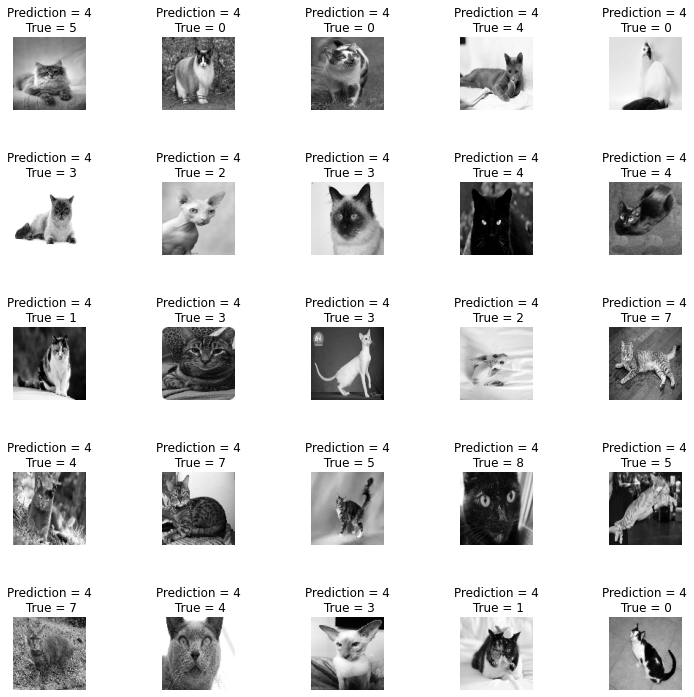

In [53]:
import matplotlib.pyplot as plt
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size=batch_size)
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i].reshape((100,100)),cmap='gray')
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_pred.argmax(axis=1)[i], Y_test.argmax(axis=1)[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1, hspace=1) 

In [54]:
from sklearn.metrics import classification_report
y_pred0 = model.predict(X_test, batch_size=batch_size)
y_pred = np.argmax(y_pred0, axis=1)
print(classification_report(Y_test.argmax(axis=1), y_pred,target_names=LB.classes_))

                precision    recall  f1-score   support

       bicolor       0.00      0.00      0.00       148
        calico       0.00      0.00      0.00       164
      hairless       0.00      0.00      0.00       209
   point_color       0.00      0.00      0.00       243
   solid_color       0.34      1.00      0.51       642
 tabby_classic       0.00      0.00      0.00       109
tabby_mackerel       0.00      0.00      0.00       103
 tabby_spotted       0.00      0.00      0.00       210
 tortoiseshell       0.00      0.00      0.00        62

      accuracy                           0.34      1890
     macro avg       0.04      0.11      0.06      1890
  weighted avg       0.12      0.34      0.17      1890



C:\Users\User\anaconda3\envs\gatos-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test.argmax(axis=1),y_pred)

0.3396825396825397

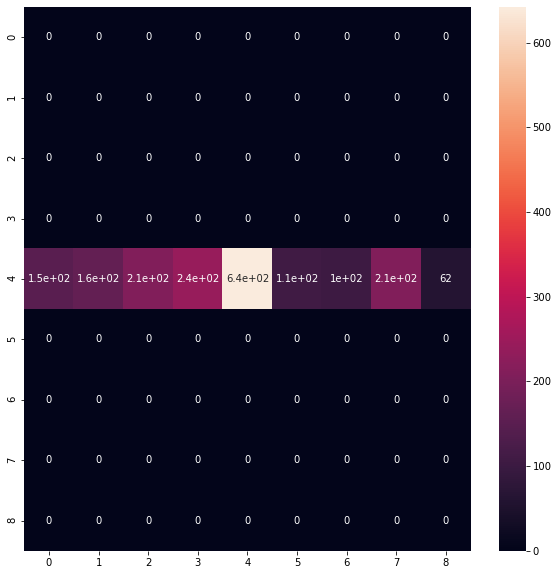

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_pred, Y_test.argmax(axis=1))
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

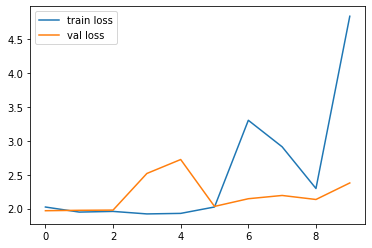

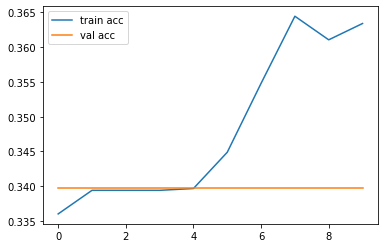

In [57]:
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()